In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

numpy는 유명한 수치해석용 라이브러리.

sklearn은 파이썬의 대표적인 머신러닝 라이브러리로 사실 딥러닝을 제외한 머신러닝은 대부분 sklearn을 이용합니다. 

matplotlib은 시각화를 위해 가져옵니다.

In [2]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[0,0],[1,1],[1,0],[0,1]],
                              shuffle=True, cluster_std=0.15)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[0,0],[1,1],[1,0],[0,1]],
                            shuffle=True, cluster_std=0.15)

make_blobs()를 이용해서 데이터를 2차원 벡터로 만들었습니다. 

80대 20으로만들었습니다. 

make_blobs()함수가 만들어내는 레이블 데이터는 각 데이터 한점 한점이 몇번째 클러스터에 속해있는지 알려주는 인덱스입니다. 

본 예제에서는 4개의 클러스터를 생성하였으므로 이미 0, 1, 2, 3으로 파싱되어 있습니다.

In [3]:
for i, x in enumerate(x_train):
    print(x, y_train[i])
    if i == 15 : break

[0.76963342 0.04336016] 2
[1.0568018  1.11905071] 1
[ 0.75487898 -0.00701441] 2
[1.04896476 1.08085528] 1
[0.11414816 0.90651401] 3
[ 0.79700531 -0.17857101] 2
[1.16508174 1.06614625] 1
[1.09883896 0.21134147] 2
[ 0.97978926 -0.11469192] 2
[ 0.42821888 -0.08159947] 0
[0.02833379 0.18538   ] 0
[ 0.94595967 -0.04697924] 2
[0.95694561 0.89472249] 1
[-0.06806462  0.0769948 ] 0
[0.23360395 1.10975201] 3
[-0.13869731  0.17385993] 0


label을 재설정해주겠습니다. 저희는 Binary Classify를 하기위한 NN을 만들려고 하거든요

In [4]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

따라서 label_map이라는 함수를 하나 구현해서 0번이나 1번을 레이블로 가진 데이터는 전부 0번 레이블을 갖도록 바꿔줍니다. 

그리고 2번이나 3번을 레이블로 가진 데이터는 전부 1번 레이블을 갖도록 바꿔줍니다. 

데이터가 제대로 만들어지고 레이블링 되어있는지 확인하기 위해 시각화를 진행합니다. 0인 데이터는 o, 1인데이터는 +로 표기했습니다.

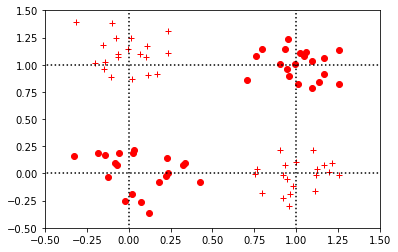

In [5]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.plot([-1, 2], [0,0], linestyle = ":", color = 'k')
plt.plot([-1, 2], [1,1], linestyle = ":", color = 'k')
plt.plot([0, 0], [-1, 2], linestyle = ":", color = 'k')
plt.plot([1, 1], [-1,2], linestyle = ":", color = 'k')
#vis_data(x_test, y_test, c='b')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.show()

In [6]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


## 벡터 [0, 1]의 레이블은 무엇인지 Ne